In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

pd.options.mode.chained_assignment = None  # default='warn'

**Import the data into dataframes**

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
alldata = pd.concat([train, test])
train_len = train.shape[0]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Explore the data**

In [3]:
alldata.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.178740,-0.150917,0.028814,-0.408106,-0.243699,-0.077221
Fare,0.178740,1.000000,0.221539,0.031428,-0.558629,0.160238,0.257307
Parch,-0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.028814,0.031428,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.408106,-0.558629,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.243699,0.160238,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


In [4]:
alldata.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


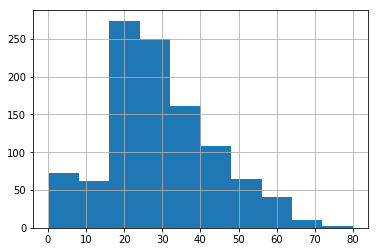

In [5]:
alldata['Age'].hist()

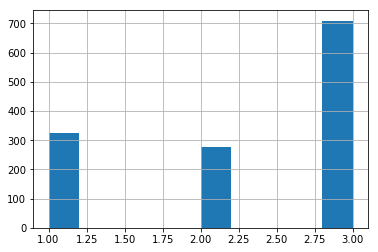

In [6]:
alldata['Pclass'].hist()

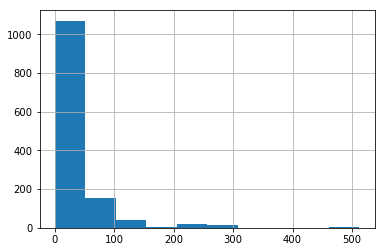

In [7]:
alldata['Fare'].hist()

**Select features**

In [8]:
allinputdata = alldata[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

**Turn categorical into numerical**

In [9]:
allinputdata['Sex_F'] = alldata.Sex.apply(lambda s: 1 if s.lower() == "female" else 0)
allinputdata.dtypes

Pclass      int64
Age       float64
SibSp       int64
Parch       int64
Fare      float64
Sex_F       int64
dtype: object

**Find missing values**

In [10]:
allinputdata.isnull().sum()[allinputdata.isnull().sum()>0]

Age     263
Fare      1
dtype: int64

**Fill missing values**

In [11]:
allinputdata.Fare = allinputdata.Fare.fillna(allinputdata.Fare.mean())
allinputdata.Age = allinputdata.Age.fillna(allinputdata.Age.mean())

**Train SVC model and evaluate on training data**

In [12]:
traindata = allinputdata[:train_len]
testdata = allinputdata[train_len:]
labels = np.array(train['Survived'])

In [16]:
svc=make_pipeline(StandardScaler(),SVC())

hyperparam_grid = [{'svc__C':[5,10,15], 'svc__kernel':['linear']},
     {'svc__C':[5,10,15,100], 'svc__gamma':[0.001, 0.01, 0.1], 'svc__kernel':['sigmoid']},
     {'svc__C':[5,10,15,100], 'svc__gamma':[0.001, 0.01, 0.1], 'svc__kernel':['rbf']}]

clf = GridSearchCV(estimator=svc, param_grid=hyperparam_grid, scoring='accuracy', cv=5, n_jobs=4)
clf.fit(traindata, labels)
print(clf.best_params_)
print(clf.best_score_)

train_predicted = clf.predict(traindata)
train_actual = np.array(train['Survived'])
accuracy = accuracy_score(train_actual, train_predicted)
print("accuracy = " + str(accuracy))

target_names = ['NotSurvived', 'Survived']
class_report = classification_report(train_actual, train_predicted, target_names=target_names)
print(class_report)

{'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
0.830527497194
accuracy = 0.840628507295
             precision    recall  f1-score   support

NotSurvived       0.84      0.91      0.88       549
   Survived       0.84      0.72      0.78       342

avg / total       0.84      0.84      0.84       891



**Predict and create submission**

In [ ]:
test_predicted = clf.predict(testdata)
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': test_predicted})
submission.to_csv('submission1.csv', index=False)

**Can I find a better answer in the RandomForests?**

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

In [18]:
# Split the dataset into train and test to get a better understanding of model performance
X_train, X_test, y_train, y_test = train_test_split(traindata, labels, test_size=0.2, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier())])

hyperparam_grid = [{'clf__n_estimators':[50,67,100,121], 
                    'clf__max_features':['log2','sqrt', 0.8],
                    'clf__criterion':['gini','entropy'],
                    'clf': [RandomForestClassifier(), ExtraTreesClassifier()]}]

clf = GridSearchCV(estimator=pipe, param_grid=hyperparam_grid, scoring='accuracy', cv=5, n_jobs=4)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

train_predicted = clf.predict(X_train)
train_actual = y_train
accuracy = accuracy_score(train_actual, train_predicted)
print("train accuracy = " + str(accuracy))

test_predicted = clf.predict(X_test)
test_actual = y_test
accuracy = accuracy_score(test_actual, test_predicted)
print("test accuracy = " + str(accuracy))

target_names = ['NotSurvived', 'Survived']
class_report = classification_report(train_actual, train_predicted, target_names=target_names)
print('Train class report:')
print('===================')
print(class_report)

class_report = classification_report(test_actual, test_predicted, target_names=target_names)
print('Test class report:')
print('===================')
print(class_report)

{'clf': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'clf__criterion': 'gini', 'clf__max_features': 'sqrt', 'clf__n_estimators': 50}
0.816011235955
train accuracy = 0.981741573034
test accuracy = 0.821229050279
Train class report:
             precision    recall  f1-score   support

NotSurvived       0.98      0.99      0.99       439
   Survived       0.99      0.97      0.98       273

avg / total       0.98      0.98      0.98       712

Test class report:
             precision    recall  f1-score   support

NotSurvived       0.82      0.90      0.86       110
   Survived       0.81      0.70      0.75        6

**What do the KNeighbors think?**

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
X_train, X_test, y_train, y_test = train_test_split(traindata, labels, test_size=0.15, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

hyperparam_grid = [{'clf__n_neighbors':[3,7,9,11,13], 
                    'clf__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'clf__weights':['uniform','distance']}]

clf = GridSearchCV(estimator=pipe, param_grid=hyperparam_grid, scoring='accuracy', cv=5, n_jobs=4)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

train_predicted = clf.predict(X_train)
train_actual = y_train
accuracy = accuracy_score(train_actual, train_predicted)
print("train accuracy = " + str(accuracy))

test_predicted = clf.predict(X_test)
test_actual = y_test
accuracy = accuracy_score(test_actual, test_predicted)
print("test accuracy = " + str(accuracy))

target_names = ['NotSurvived', 'Survived']
class_report = classification_report(train_actual, train_predicted, target_names=target_names)
print('Train class report:')
print('===================')
print(class_report)

class_report = classification_report(test_actual, test_predicted, target_names=target_names)
print('Test class report:')
print('===================')
print(class_report)

{'clf__algorithm': 'auto', 'clf__n_neighbors': 11, 'clf__weights': 'uniform'}
0.808454425363
train accuracy = 0.836195508587
test accuracy = 0.813432835821
Train class report:
             precision    recall  f1-score   support

NotSurvived       0.85      0.89      0.87       470
   Survived       0.81      0.75      0.78       287

avg / total       0.83      0.84      0.83       757

Test class report:
             precision    recall  f1-score   support

NotSurvived       0.81      0.90      0.85        79
   Survived       0.83      0.69      0.75        55

avg / total       0.81      0.81      0.81       134



**Maybe this algorithm can give me a GradientBoost?**

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(traindata, labels, test_size=0.2, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('clf', GradientBoostingClassifier())])

hyperparam_grid = [{'clf__n_estimators':[30,40,50,80,100], 
                    'clf__learning_rate':[0.01, 0.03, 0.05, 0.08],
                    'clf__subsample':[0.4, 0.5],
                    'clf__max_depth':[3,5,7,9]}]

clf = GridSearchCV(estimator=pipe, param_grid=hyperparam_grid, scoring='accuracy', cv=5, n_jobs=4)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
#print(clf.best_estimator_[1].feature_importances_)

train_predicted = clf.predict(X_train)
train_actual = y_train
accuracy = accuracy_score(train_actual, train_predicted)
print("train accuracy = " + str(accuracy))

test_predicted = clf.predict(X_test)
test_actual = y_test
accuracy = accuracy_score(test_actual, test_predicted)
print("test accuracy = " + str(accuracy))

target_names = ['NotSurvived', 'Survived']
class_report = classification_report(train_actual, train_predicted, target_names=target_names)
print('Train class report:')
print('===================')
print(class_report)

class_report = classification_report(test_actual, test_predicted, target_names=target_names)
print('Test class report:')
print('===================')
print(class_report)

{'clf__learning_rate': 0.05, 'clf__max_depth': 7, 'clf__n_estimators': 30, 'clf__subsample': 0.4}
0.837078651685
train accuracy = 0.900280898876
test accuracy = 0.849162011173
Train class report:
             precision    recall  f1-score   support

NotSurvived       0.88      0.97      0.92       439
   Survived       0.95      0.78      0.86       273

avg / total       0.90      0.90      0.90       712

Test class report:
             precision    recall  f1-score   support

NotSurvived       0.83      0.95      0.89       110
   Survived       0.89      0.70      0.78        69

avg / total       0.85      0.85      0.84       179



**All together now**

In [27]:
from sklearn.ensemble import VotingClassifier

# svc, randomforest, kneighbors, gradientboosting, gaussianbayes
svc = make_pipeline(StandardScaler(), SVC(C=10, gamma=0.1, kernel='rbf', probability=True))
rndfor = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=50, max_features='sqrt'))
knc = make_pipeline(StandardScaler(), KNeighborsClassifier(weights='uniform', n_neighbors=11, algorithm='auto'))
gbt = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=30, subsample=0.5, 
                                                                 learning_rate=0.05, max_depth=7))

clf = VotingClassifier(estimators=[('svc', svc), ('rndfor', rndfor), ('knc', knc), ('gbt', gbt)], 
                       voting='hard', n_jobs=4)

clf.fit(X_train, y_train)

train_predicted = clf.predict(X_train)
train_actual = y_train
accuracy = accuracy_score(train_actual, train_predicted)
print("train accuracy = " + str(accuracy))

test_predicted = clf.predict(X_test)
test_actual = y_test
accuracy = accuracy_score(test_actual, test_predicted)
print("test accuracy = " + str(accuracy))

target_names = ['NotSurvived', 'Survived']
class_report = classification_report(train_actual, train_predicted, target_names=target_names)
print('Train class report:')
print('===================')
print(class_report)

class_report = classification_report(test_actual, test_predicted, target_names=target_names)
print('Test class report:')
print('===================')
print(class_report)

train accuracy = 0.894662921348
test accuracy = 0.843575418994
Train class report:
             precision    recall  f1-score   support

NotSurvived       0.86      0.99      0.92       439
   Survived       0.98      0.74      0.84       273

avg / total       0.91      0.89      0.89       712

Test class report:
             precision    recall  f1-score   support

NotSurvived       0.82      0.95      0.88       110
   Survived       0.90      0.67      0.77        69

avg / total       0.85      0.84      0.84       179



In [25]:
test_predicted = clf.predict(testdata)
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': test_predicted})
submission.to_csv('submission2.csv', index=False)